In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVR

In [3]:
bp = pd.read_csv("Breast_Cancer.csv")
bp

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive


In [4]:
bp.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [5]:
#Applying label encoding for the conversion of objects to numerical values 

le = LabelEncoder()
bp["Race"] = le.fit_transform(bp["Race"])
bp["Marital Status"] = le.fit_transform(bp["Marital Status"])
bp["T Stage "] = le.fit_transform(bp["T Stage "])
bp["N Stage"] = le.fit_transform(bp["N Stage"])
bp["6th Stage"] = le.fit_transform(bp["6th Stage"])
bp["differentiate"] = le.fit_transform(bp["differentiate"])
bp["Grade"] = le.fit_transform(bp["Grade"])
bp["A Stage"] = le.fit_transform(bp["A Stage"])
bp["Estrogen Status"] = le.fit_transform(bp["Estrogen Status"])
bp["Progesterone Status"] = le.fit_transform(bp["Progesterone Status"])
bp["Status"] = le.fit_transform(bp["Status"])
bp

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,2,1,0,0,0,1,3,1,4,1,1,24,1,60,0
1,50,2,1,1,1,2,0,2,1,35,1,1,14,5,62,0
2,58,2,0,2,2,4,0,2,1,63,1,1,14,7,75,0
3,58,2,1,0,0,0,1,3,1,18,1,1,2,1,84,0
4,47,2,1,1,0,1,1,3,1,41,1,1,3,1,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,1,1,0,0,0,0,2,1,9,1,1,1,1,49,0
4020,56,2,0,1,1,2,0,2,1,46,1,1,14,8,69,0
4021,68,2,1,1,0,1,0,2,1,22,1,0,11,3,69,0
4022,58,0,0,1,0,1,0,2,1,44,1,1,11,1,72,0


In [6]:
bp.isna().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [7]:
bp.duplicated().sum()

1

In [8]:
bp.drop_duplicates(inplace=True)

In [9]:
#extraction x values 

x = bp.iloc[:,:-1].values
x

array([[ 68,   2,   1, ...,  24,   1,  60],
       [ 50,   2,   1, ...,  14,   5,  62],
       [ 58,   2,   0, ...,  14,   7,  75],
       ...,
       [ 68,   2,   1, ...,  11,   3,  69],
       [ 58,   0,   0, ...,  11,   1,  72],
       [ 46,   2,   1, ...,   7,   2, 100]], dtype=int64)

In [10]:
#extracting y value

y=bp.iloc[:,-1].values
y

array([0, 0, 0, ..., 0, 0, 0])

In [11]:
#spliting data set into test and train 

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=1/3,random_state=0)

In [12]:
x_train

array([[ 41,   2,   1, ...,   6,   1,  97],
       [ 55,   2,   2, ...,  21,   1,  87],
       [ 69,   0,   0, ...,  21,  19,  11],
       ...,
       [ 56,   2,   1, ...,   8,   1,  77],
       [ 65,   1,   1, ...,  11,   6, 100],
       [ 51,   2,   4, ...,  14,   4,  83]], dtype=int64)

In [13]:
x_test

array([[51,  2,  1, ..., 12,  2, 46],
       [59,  2,  1, ..., 12,  2, 21],
       [65,  2,  3, ..., 25, 22, 79],
       ...,
       [66,  2,  1, ...,  9,  2, 72],
       [39,  2,  1, ..., 26,  2, 71],
       [69,  2,  1, ..., 21,  9, 82]], dtype=int64)

In [14]:
y_train

array([0, 0, 1, ..., 0, 0, 0])

In [15]:
y_test

array([0, 0, 1, ..., 0, 0, 1])

In [16]:
#fitting linear regression into the model 

ml_model=LinearRegression()
ml_model.fit(x_train,y_train)

LinearRegression()

In [17]:
#prediction of test and train result 

x_pred = ml_model.predict(x_train)
y_pred = ml_model.predict(x_test)

In [18]:
x_pred

array([-0.04687097, -0.04773674,  0.72565845, ...,  0.08739371,
        0.04500942,  0.03228597])

In [19]:
y_pred

array([0.33833928, 0.49177439, 0.35446532, ..., 0.13380601, 0.03294766,
       0.15668742])

In [20]:
#we can compare y_pred values with y_test values 

y_test

array([0, 0, 1, ..., 0, 0, 1])

In [21]:
#checking accuracy(score) of training and test data

train_score = ml_model.score(x_train,y_train)
test_score = ml_model.score(x_test,y_test)

print("Score of train set is ", train_score)
print("Score of test set is ", test_score)

Score of train set is  0.30424139759106195
Score of test set is  0.28872185834352937


In [22]:
from sklearn.metrics import r2_score
accuracy = r2_score(y_test,y_pred)
accuracy

0.28872185834352937

In [23]:
bp.describe()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
count,4023.000000,4023.000000,4023.000000,4023.000000,4023.000000,4023.000000,4023.000000,4023.000000,4023.000000,4023.000000,4023.000000,4023.000000,4023.000000,4023.000000,4023.000000,4023.000000
mean,53.969923,1.775789,1.371365,0.784986,0.438479,1.322148,0.690529,2.131742,0.977131,30.477007,0.933134,0.826498,14.358439,4.158837,71.301765,0.153120
std,8.963118,0.564524,1.063754,0.765526,0.693531,1.266610,1.016486,0.642475,0.149503,21.121253,0.249820,0.378728,8.100241,5.109724,22.923009,0.360147
min,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,47.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,16.000000,1.000000,1.000000,9.000000,1.000000,56.000000,0.000000
50%,54.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,1.000000,25.000000,1.000000,1.000000,14.000000,2.000000,73.000000,0.000000
75%,61.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000,19.000000,5.000000,90.000000,0.000000
max,69.000000,2.000000,4.000000,3.000000,2.000000,4.000000,3.000000,3.000000,1.000000,140.000000,1.000000,1.000000,61.000000,46.000000,107.000000,1.000000


In [24]:
#Decison tree regressor 
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [25]:
pred = dtr.predict(x_test)
pred

array([1., 1., 1., ..., 0., 0., 0.])

In [26]:
from sklearn.metrics import r2_score
accuracy1 = r2_score(y_test,pred)
accuracy1

-0.4280226602514354

In [27]:
#creation of confusion matrix 

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,pred)
cm

array([[1000,  137],
       [ 110,   94]], dtype=int64)

In [28]:
# Random forest regression 

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=7)
rfr.fit(x_train,y_train)

RandomForestRegressor(n_estimators=7)

In [29]:
pred1 = rfr.predict(x_test)
pred1

array([0.85714286, 0.85714286, 0.28571429, ..., 0.        , 0.        ,
       0.14285714])

In [30]:
from sklearn.metrics import r2_score
accuracy2 = r2_score(y_test,pred1)
accuracy2

0.2716529883721299

In [31]:
#fitting decision tree model to the training set

from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion="entropy", random_state=0)

classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [32]:
#prediciton result

pred3 = classifier.predict(x_test)
pred3

array([1, 1, 1, ..., 0, 0, 0])

In [33]:
#creation of confusion matrix 

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,pred3)
cm

array([[1024,  113],
       [ 107,   97]], dtype=int64)

In [34]:
# checking accuracy

from sklearn.metrics import accuracy_score

accuracy3 = accuracy_score(y_test,pred3)

print("Accuracy : ",accuracy3*100, "%")

Accuracy :  83.59433258762118 %


In [35]:
#fitting random forest to the training set: 

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(random_state=100)

#classifier = RandomForestClassifier(n_estimators=10,criterion="entropy")

classifier.fit(x_train,y_train)

RandomForestClassifier(random_state=100)

In [36]:
#prediction result 

pred4 = classifier.predict(x_test)
pred4

array([1, 1, 0, ..., 0, 0, 0])

In [37]:
#creation of confusion matrix 

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,pred4)
cm

array([[1113,   24],
       [ 102,  102]], dtype=int64)

In [38]:
# checking accuracy

from sklearn.metrics import accuracy_score

accuracy4 = accuracy_score(y_test,pred4)

print("Accuracy : ",accuracy4*100, "%")

Accuracy :  90.60402684563759 %


,Model,Accuracy_Score
4,RFC,0.906040
3,DTC,0.835943
0,LR,0.288722
2,RFR,0.271653
1,DTR,-0.428023


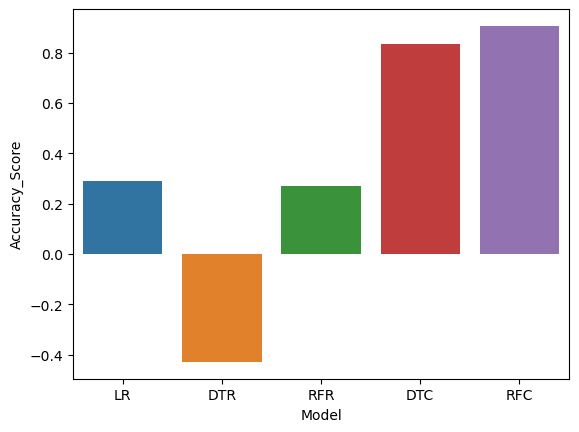

In [39]:
import seaborn as sns 

df = pd.DataFrame({
    "Model":["LR","DTR","RFR","DTC","RFC"],
    "Accuracy_Score":[accuracy,accuracy1,accuracy2,accuracy3,accuracy4]
})

df

sns.barplot(x="Model",y="Accuracy_Score",data=df)
df.sort_values(by="Accuracy_Score",ascending=False)

In [41]:
svr = SVR(kernel="linear")
svr.fit(x_train,y_train)

SVR(kernel='linear')

In [47]:
pred5 = svr.predict(x_test)
pred5

array([0.16175092, 0.23826172, 0.1573153 , ..., 0.03775944, 0.00542627,
       0.05580044])

In [48]:
svr.score(x_test,y_test)

0.16997644692317426